<a href="https://colab.research.google.com/github/Nuranisah05/Machine_Learning_2025/blob/main/Praktikum09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Liberary**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import axes

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **2. Load Data**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum09"

In [6]:
titanic_data = pd.read_csv(path + '/data/tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C




*   Menampilkan Info Data



In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# **3. Missing Value**



*   Cek Missing Value



In [11]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1




*   Menghapus Kolom Missing Value



In [13]:
titanic_data = titanic_data.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)



*   Mengecek Outlier



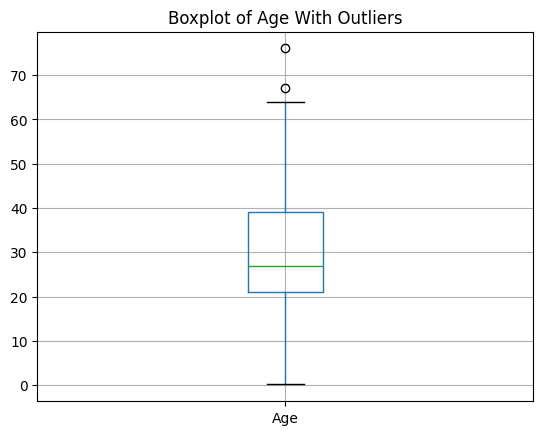

In [14]:
titanic_data.boxplot(column=['Age'])
plt.title('Boxplot of Age With Outliers')
plt.show()

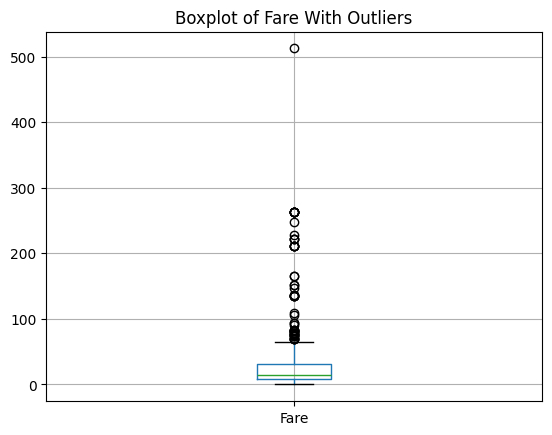

In [16]:
titanic_data.boxplot(column=['Fare'])
plt.title('Boxplot of Fare With Outliers')
plt.show()



*   Menangani Missing Value dengan Mengisi



In [20]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

/tmp/ipython-input-423417795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/tmp/ipython-input-423417795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in



*   Mengecek Kembali Missing Value



In [21]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# **4. Data Analysis dan Ecoding Kategorikal**



*   Statistika Deskriptif



In [22]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.634534,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200




*   Value Counts



In [23]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [48]:
titanic_data['Sex'].value_counts()

,count
Sex,
0,266
1,152


In [49]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,218
1,107
2,93




*   Visualisasi Data sns.counplot



<function matplotlib.pyplot.show(close=None, block=None)>

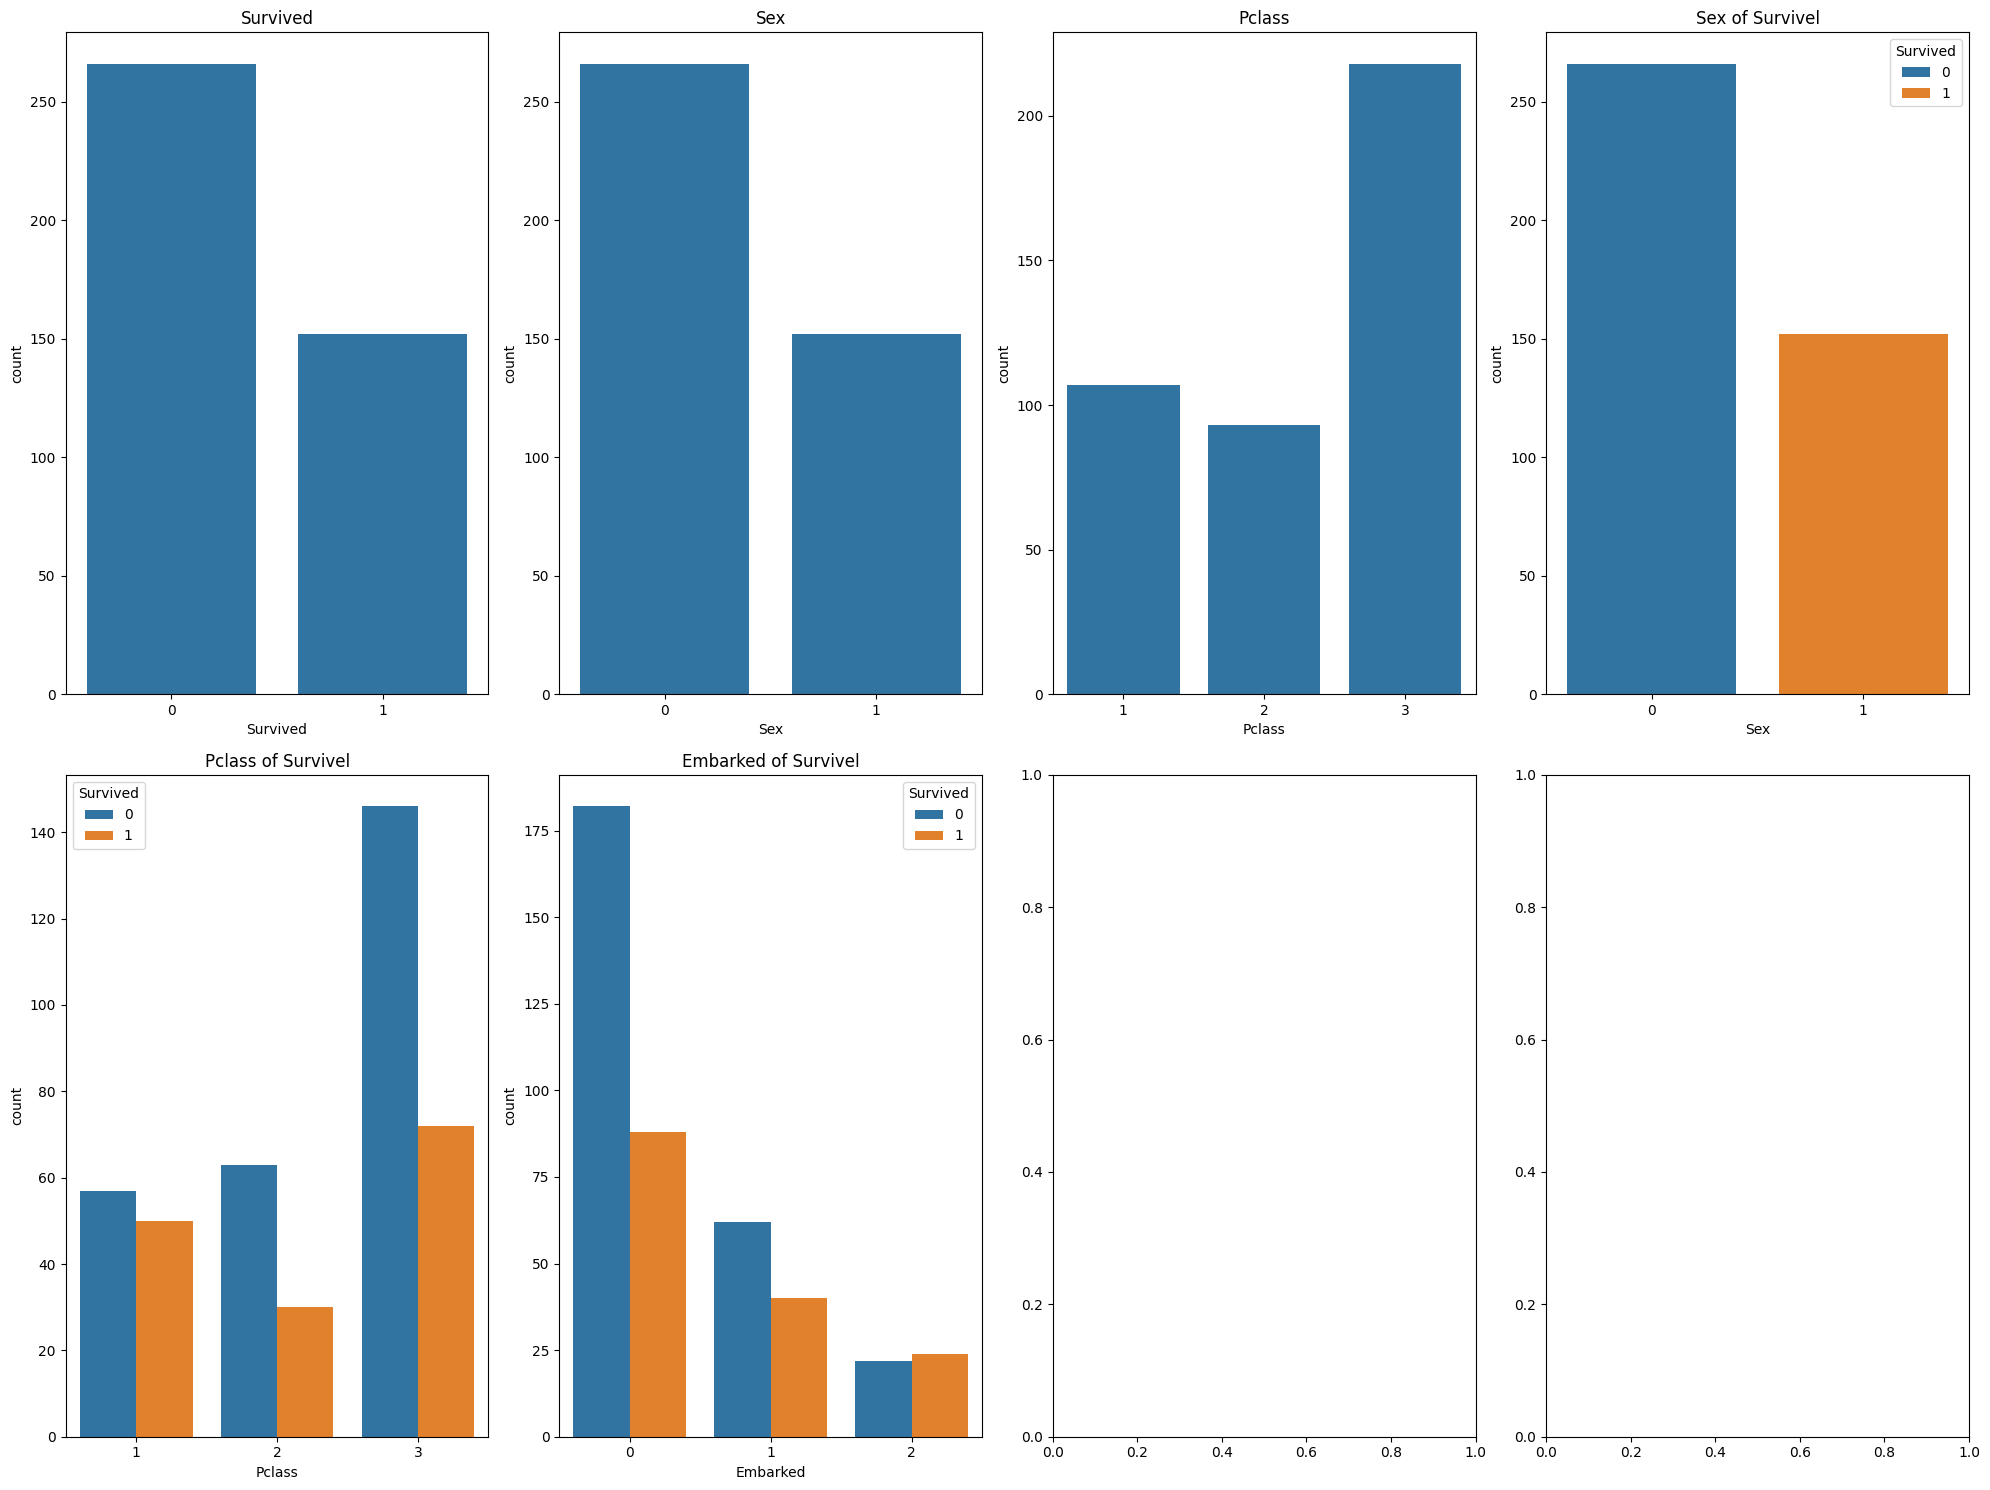

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))

axes = axes.flatten()

sns.countplot(x='Survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survived')

sns.countplot(x='Sex', data=titanic_data, ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(x='Pclass', data=titanic_data, ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x= 'Sex', hue= 'Survived', data=titanic_data, ax=axes[3])
axes[3].set_title('Sex of Survivel')

sns.countplot(x= 'Pclass', hue= 'Survived', data=titanic_data, ax=axes[4])
axes[4].set_title('Pclass of Survivel')

sns.countplot(x= 'Embarked', hue= 'Survived', data=titanic_data, ax=axes[5])
axes[5].set_title('Embarked of Survivel')

plt.tight_layout()
plt.show



*   Encoding Kategorikal



In [51]:
replacements = {'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}
titanic_data.replace(replacements, inplace=True)

In [52]:
titanic_data.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


# **5. Separiting, Splitting, dan Scaling Data**

In [53]:
X= titanic_data.drop(columns=['Survived'], axis=1)
Y= titanic_data['Survived']

In [34]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [54]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **6. Naive Bayes Classification**

In [56]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

# **7. Accuracy Score dan Evaluation**

In [57]:
#Akurasi
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

print("Akurasi Data Training : ", accuracy_score(Y_train, train_pred_nb))
print("Akurasi Data Testing : ", accuracy_score(Y_test, test_pred_nb))

Akurasi Data Training :  1.0
Akurasi Data Testing :  1.0


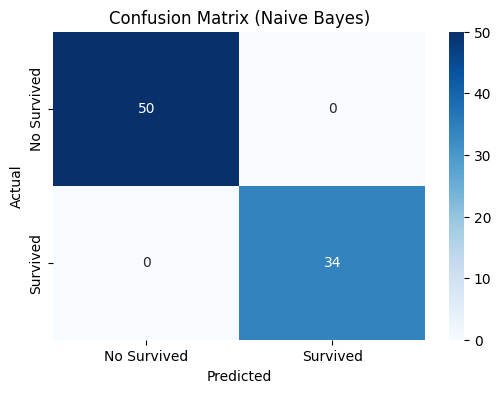

In [58]:
#Visualisasi Confusion Matrix (Niave Bayes)
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Survived', 'Survived'],
            yticklabels=['No Survived', 'Survived'])

plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
#Classification Report
print("n/Classification Report (Naive Bayes):")
print(classification_report(Y_test, test_pred_nb))

n/Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# **8. Cross Validation**

In [60]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')

print("n/Cross Validation (Naive Bayes) 5-Fold:")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Standard Deviation:", cv_nb.std())

n/Cross Validation (Naive Bayes) 5-Fold:
Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0
